In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pickle
df = pd.read_pickle('sampled_data_bands.pkl')
X_train = pd.read_pickle('train_data_unscaled.pkl')
training_data = pickle.load(open('training_data.pkl','rb')) 
ssX = pickle.load(open('ssX.pkl','rb'))
X_train_scaled = training_data[0]
y_train = training_data[1]

In [4]:
temp = df.loc[X_train.index.values,:]
temp.head()
tracks = temp.track_name
track_dict = {}

In [5]:
albums = {}
fp = open('/Users/mcassettix/Music/metallica_discography.txt','r')
output = fp.read()
index = output.find('ALBUM/TRACK LISTING')
new_data = output[index:-1]
the_list = new_data.splitlines()
for index, line in enumerate(the_list):
    if fuzz.partial_ratio('Metallica - 19',line) == 100:
        tracks = []
        curr_line = line
        i = 0
        
        while(fuzz.partial_ratio('Metallica - 19',curr_line) > 0.0):
            tracks.append(curr_line)
            curr_line = the_list[index + i] 
            i += 1
        albums[line] = tracks
        
  

In [62]:
count = 0 
arr = np.empty((0,3), int)
for key in albums.keys():
    count += 1
    print(key)
    if count > 6:
        continue
            
    album = albums[key]
    for song in album:
        tmp_df = df[df['track_name'] == song.lstrip()].copy()
        if tmp_df.shape[0]>0:
            X = tmp_df.drop(['index','track_name','band'],axis=1)
            X['bpm'] = pd.to_numeric(X['bpm'], errors='coerce').fillna(0)
            X['harmonic_rythmic_ratio'] = pd.to_numeric(X['harmonic_rythmic_ratio'], errors='coerce').fillna(0)
            X['spectral_centroid'] = pd.to_numeric(X['spectral_centroid'], errors='coerce').fillna(0)
            X['spectral_flatness'] = pd.to_numeric(X['spectral_flatness'], errors='coerce').fillna(0)
            X['count_delta_above_mean'] = pd.to_numeric(X['count_delta_above_mean'], errors='coerce').fillna(0)
            X['ratio_above_rmse_mean'] = pd.to_numeric(X['ratio_above_rmse_mean'], errors='coerce').fillna(0)
            X['max_rmse'] = pd.to_numeric(X['max_rmse'], errors='coerce').fillna(0)
            X['mean_rms'] = pd.to_numeric(X['mean_rms'], errors='coerce').fillna(0)
            X['mean_zcr'] = pd.to_numeric(X['mean_zcr'], errors='coerce').fillna(0)
            X_train_tmp= ssX.transform(X) 
            arr = np.vstack(X_train_tmp.astype(float))
           
      
   


Metallica - 1983 - Kill 'em All
Metallica - 1984 - Jump In The Fire
Metallica - 1984 - Ride The Lightning
Metallica - 1986 - Master Of Puppets
Metallica - 1987 - Creeping Death
Metallica - 1987 - The $9.98 Cd Garage Days Re-Revisited
Metallica - 1988 - And Justice For All
Metallica - 1991 - The Black Album
Metallica - 1992 - New Skulls For The Old Ceremony
Metallica - 1993 - Live Shit, Binge And Purge - CD 1
Metallica - 1993 - Live Shit, Binge And Purge - CD 2
Metallica - 1993 - Live Shit, Binge And Purge - CD 3
Metallica - 1994 - One (German Single)
Metallica - 1996 - Load
Metallica - 1997 - Acoustic Metal
Metallica - 1997 - Reload
Metallica - 1998 - Garage Inc - CD 1
Metallica - 1998 - Garage Inc - CD 2
Metallica - 1998 - The Complete Garage Days
Metallica - 1999 - S & M - CD 1
Metallica - 1999 - S & M - CD 2


In [63]:
X_train_subset = df[df['track_name'] == '03 - Fade To Black.mp3'].copy()
X_train_subset.drop(['index','track_name','band'],axis=1,inplace=True)

X_train_subscaled= ssX.transform(X_train_subset)   

In [64]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=100.0)

X_train_scaled_to_fit = X_train_scaled[:2000,:]
X_subset_to_fit = arr
X_tosne = np.concatenate([X_train_scaled_to_fit, X_subset_to_fit],axis=0)
Xsne = tsne.fit_transform(X_tosne)
#X_subset = tsne.transform(X_train_subscaled)


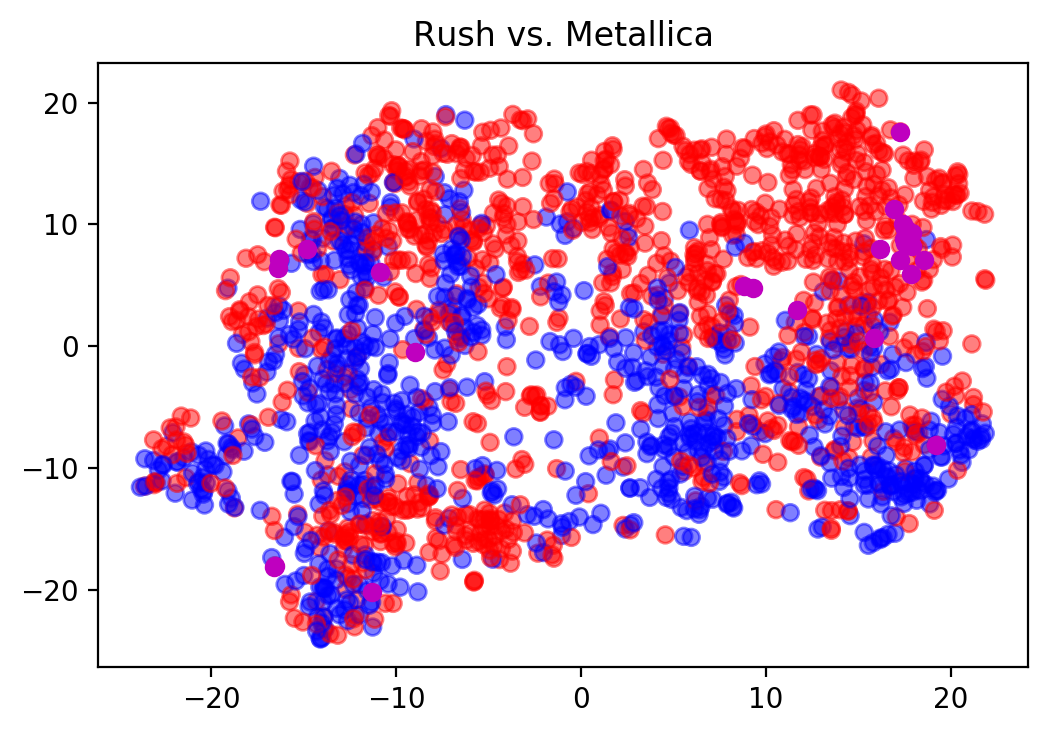

In [66]:
plt.figure(dpi=200)
plt.scatter(Xsne[:len(X_train_scaled_to_fit),0],Xsne[:len(X_train_scaled_to_fit),1],c=['b' if band==1 else 'r' for band in y_train], alpha=0.5)
#labels = ['Metallica','Rush']
#ax.legend(labels)
plt.scatter(Xsne[len(X_train_scaled_to_fit):, 0], Xsne[len(X_train_scaled_to_fit):, 1], c='m', label='Post 1988 Metallica');
plt.title('Rush vs. Metallica')
ax = plt.gca()
#labels = ['Metallica','Rush']
#ax.legend(labels)


In [14]:
import numpy as np

from bokeh.plotting import figure, show, output_file

N = 4000
x = Xsne[:len(X_train_scaled_to_fit),0]
y = Xsne[:len(X_train_scaled_to_fit),1]


radii = np.random.random(size=N) * 1.5
colors_red = [
    "#%02x%02x%02x" % (int(r), int(b), 150) for r, b in zip(40+2*x, 30+2*y)
]
colors_blue = [
    "#%02x%02x%02x" % (int(r), int(b), 150) for r, b in zip(50+2*x, 40+2*y)
]

_lda_keys = ['Metallica','Rush']

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter(Xsne[:len(X_train_scaled_to_fit),0],Xsne[:len(X_train_scaled_to_fit),1],\
          c=['r' if band==1 else 'b' for band in y_train], radius=radii,
          fill_color=colors, 
          fill_alpha=0.6,
          line_color=None)

plt.scatter(Xsne[len(X_train_scaled_to_fit):, 0], Xsne[len(X_train_scaled_to_fit):, 1], c='m',radius=radii,
          fill_color=colors, 
          fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

/Users/mcassettix/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('radius', 4000), ('x', 2000)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/mcassettix/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('radius', 4000), ('x', 2000), ('y', 2000)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))
/Users/mcassettix/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('fill_color', 4000), ('radius', 4000), ('x', 2000), ('y', 2000)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


AttributeError: unexpected attribute 'c' to Circle, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_dimension, radius_units, size, subscribed_events, tags, x or y

In [233]:
df.band.replace('Metallica',0,inplace=True)
df.band.replace('Rush',1,inplace=True)


,index,track_name,bpm,harmonic_rythmic_ratio,spectral_centroid,spectral_flatness,count_delta_above_mean,ratio_above_rmse_mean,max_rmse,mean_rms,mean_zcr,band
0,148,4 - Limelight.mp3,89.10290948275862,3.5583296,1686.4585213145274,0.00582094,0,0.6911764705882353,0.097900845,0.056995194,0.07279778079710145,1
1,3722,07 - Orion (Instrumental).mp3,129.19921875,4.8556867,2000.2844087632832,0.013070458,12,0.5436241610738255,0.20186672,0.079553574,0.06671832540760869,0
2,2120,1 - Bastille Day.mp3,103.359375,1.3164884,2098.2022756528363,0.019427974,0,1.2958579881656804,0.27656603,0.1475775,0.10958767920425258,1
3,2441,02 - St. Anger.mp3,92.28515625,1.5321984,2545.9767516650304,0.038557682,0,1.169064748201439,0.42648128,0.33256802,0.14184691775497513,0
4,3197,08 - The Wait.mp3,161.4990234375,3.1249948,1838.5850343973295,0.013156818,0,0.9695431472081218,0.15927805,0.119250305,0.06252768605025773,0


In [ ]:
import seaborn as sns

sns.pairplot(df.drop(['index','track_name'],axis=1))